In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

C:\Users\Predator\Envs\kn_ml\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Predator\Envs\kn_ml\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tqdm.notebook import tqdm

In [5]:
from torchinfo import summary

In [6]:
train_dataset = datasets.FashionMNIST(root='dataset/',train=True, transform = transforms.ToTensor(),download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size = 64, shuffle=True)

test_dataset = datasets.FashionMNIST(root='dataset/', train=False,transform = transforms.ToTensor(),download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size = 64, shuffle=True)


In [7]:
print(f'Length of Train Set: {len(train_dataset)}')
print(f'Length of Train Loader: {len(train_loader)}')
print(f'Length of Test Set: {len(test_dataset)}')
print(f'Length of Test Loader: {len(test_loader)}')

Length of Train Set: 60000
Length of Train Loader: 938
Length of Test Set: 10000
Length of Test Loader: 157


In [8]:
img = next(iter(train_loader))
img[0].size()

torch.Size([64, 1, 28, 28])

9


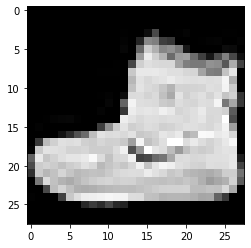

In [9]:
image, label = next(iter(train_dataset))
plt.imshow(image[0],cmap='gray')
print(label)

image tensor: torch.Size([64, 1, 28, 28])
class labels: tensor([6, 8, 9, 6, 3, 0, 6, 3, 7, 4, 4, 7, 7, 3, 3, 6, 3, 5, 4, 6, 3, 4, 5, 1,
        3, 8, 1, 0, 0, 5, 8, 9, 6, 8, 5, 4, 2, 0, 2, 9, 5, 1, 9, 9, 2, 2, 2, 2,
        3, 8, 8, 9, 8, 0, 5, 2, 9, 6, 7, 6, 5, 8, 5, 8])


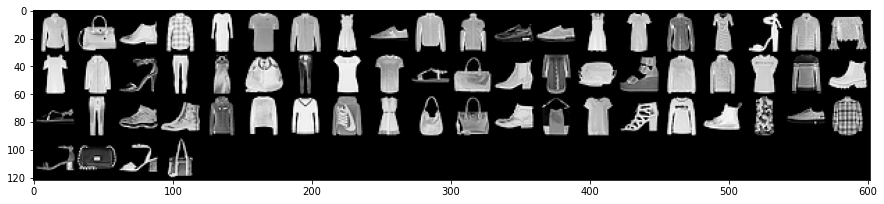

In [10]:
images, labels = next(iter(train_loader))

# create a grid 
plt.figure(figsize=(15,10))
grid = torchvision.utils.make_grid(nrow=20, tensor=images)
print(f"image tensor: {images.shape}")
print(f"class labels: {labels}")
plt.imshow(np.transpose(grid, axes=(1,2,0)), cmap='gray');

# Defining Network Architecture

In [11]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.l1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.l2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.fc1 = nn.Linear(in_features = 64*6*6, out_features = 600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features = 600, out_features = 120)
        self.fc3 = nn.Linear(in_features = 120, out_features = 10)
        
        
    def forward(self,x):
        x = self.l1(x)
        x = self.l2(x)
        x= x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [12]:
model = CNNModel()
model

CNNModel(
  (l1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (l2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)

In [13]:
summary(model)

Layer (type:depth-idx)                   Param #
CNNModel                                 --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       320
│    └─BatchNorm2d: 2-2                  64
│    └─MaxPool2d: 2-3                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-4                       18,496
│    └─BatchNorm2d: 2-5                  128
│    └─MaxPool2d: 2-6                    --
├─Linear: 1-3                            1,383,000
├─Dropout2d: 1-4                         --
├─Linear: 1-5                            72,120
├─Linear: 1-6                            1,210
Total params: 1,475,338
Trainable params: 1,475,338
Non-trainable params: 0

In [14]:
#Defining hyperparameters
learning_rate = 0.001
epochs = 30

#Defining the loss
criterion = nn.CrossEntropyLoss()

#Defining the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
for batch_idx, (data, target) in enumerate(train_loader):
    print(f'Batch Index: {batch_idx}')
    print(f'Data: {data}')
    print(f'Data Shape: {data.shape}')
    print(f'Target: {target}')
    print(f'Length of Target: {target.shape}')
    break

Batch Index: 0
Data: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          

In [16]:
def train(model, train_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    count = 0
    correct = 0
    total = 0
    loss_list = []
    iteration_list = []
    accuracy_list = []
    predictions_list = []
    labels_list =[]
    
    for e in range(epochs):
#         running_loss = 0
        loop = tqdm(train_loader, total=len(train_loader), leave=True)
        for batch_idx, (images, labels) in enumerate(loop):
            #for images, labels in train_loader:
            # Transfering images and labels to GPU if available
            images = images.to(device=device)
            labels = labels.to(device=device)
            
            #Forward Pass
            outputs = model(images)
            loss = criterion(outputs, labels)
        
            # Initializing a gradient as 0 so there is no mixing of gradient among the batches
            optimizer.zero_grad()

            #Propagating the error backward
            loss.backward()

            # Optimizing the parameters
            optimizer.step()
            
            count+=1
            
            if count%100 ==0 :
                loss_list.append(loss.item())

                predictions = torch.max(outputs,1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions==labels).sum()
                total+=len(labels)

                accuracy = (correct * 100)/total
                iteration_list.append(count)
                accuracy_list.append(accuracy.item())

                loop.set_description(f'Epoch [{e+1}/{epochs}]')
                loop.set_postfix(loss=loss.item(), accuracy = accuracy.item())
            
    return iteration_list, loss_list, accuracy_list

In [17]:
iterations, losses, accuracies = train(model, train_loader)

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

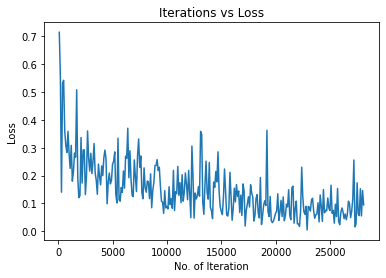

In [18]:
plt.plot(iterations, losses)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

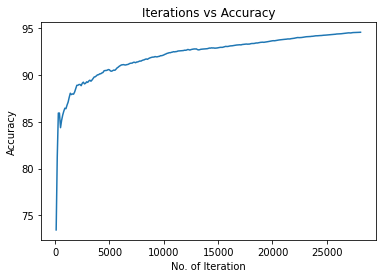

In [19]:
plt.plot(iterations, accuracies)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

In [28]:
def test(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    count = 0
    correct = 0
    total = 0
    loss_list = []
    iteration_list = []
    accuracy_list = []
    predictions_list = []
    labels_list =[]
    
    for e in range(1):
#         running_loss = 0
        loop = tqdm(test_loader, total=len(test_loader), leave=True)
        for batch_idx, (images, labels) in enumerate(loop):
            #for images, labels in train_loader:
            # Transfering images and labels to GPU if available
            images = images.to(device=device)
            labels = labels.to(device=device)
            
            #Forward Pass
            outputs = model(images)
            
            loss = criterion(outputs, labels)
            
            count+=1
            
#             if count%50 ==0 :
            loss_list.append(loss.item())

            predictions = torch.max(outputs,1)[1].to(device)
            predictions_list.append(predictions)
            correct += (predictions==labels).sum()
            total+=len(labels)

            accuracy = (correct * 100)/total
            iteration_list.append(count)
            accuracy_list.append(accuracy.item())

            loop.set_description(f'Epoch [{e+1}/{epochs}]')
            loop.set_postfix(loss=loss.item(), accuracy = accuracy.item())
            
    return iteration_list, loss_list, accuracy_list

In [29]:
test_iterations, test_losses, test_accuracies = test(model, test_loader)

  0%|          | 0/157 [00:00<?, ?it/s]

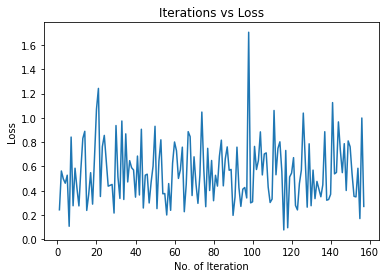

In [30]:
plt.plot(test_iterations, test_losses, label='Test')
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

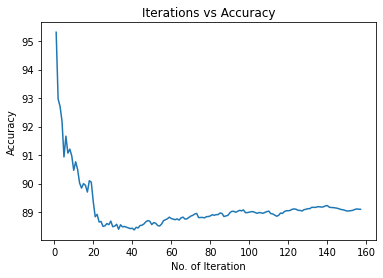

In [31]:
plt.plot(test_iterations, test_accuracies)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()